In [0]:
#Start by making sure we have all the software we need

#Install Cartopy
!wget https://anaconda.org/conda-forge/cartopy/0.16.0/download/linux-64/cartopy-0.16.0-py36h81b52dc_2.tar.bz2
!tar xvjf cartopy-0.16.0-py36h81b52dc_2.tar.bz2
!cp -r lib/python3.6/site-packages/* /usr/local/lib/python3.6/dist-packages/
!pip install shapely pyshp
!apt install libproj-dev libgeos-dev

#Import all necessary modules
import urllib.request, json 
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

In [0]:
#First we need to collect the data

def get_data():
  #Collect coordinates and create the appropriate url
  part1 = "https://api.openweathermap.org/data/2.5/weather?lat="
  part2 = "&lon="
  part3 = "&appid=f2c98aee42e2ba03c8d9fb0903af27e4&units=imperial"
  latstr = str(lat)
  lonstr = str(lon)
  string = part1 + latstr + part2 + lonstr + part3
  
  #Make an API call with the url
  with urllib.request.urlopen(string) as url:
    data = json.loads(url.read().decode())
  
  #Collect weather data for the desired location from the call and put it into a dictionary
  weather = {'location': data['name'],
             'condition': data['weather'][0]['main'],
             'temp': data['main']['temp'],
             'humidity': data['main']['humidity'],
             'wind speed': data['wind']['speed']
            }
  
  #Print the weather data in an ordered fashion
  print('Location:',weather['location'])
  print('Condition:',weather['condition'])
  print('Temperature:',("%.1f" % weather['temp']),'degrees Fahrenheit')
  print('Humidity:',weather['humidity'],'%')
  print('Wind Speed:',weather['wind speed'],'mph')

In [0]:
#Next, we will plot the desired location on a map

def plot_map():
  #Create a map wth cartopy
  ax = plt.axes(projection=ccrs.PlateCarree())
  
  ax.set_extent([float(lon) - 45, float(lon) + 45, float(lat) - 30, float(lat) + 30], crs=ccrs.PlateCarree())
  
  ax.stock_img()
  
  #Plot the coordinates
  plt.plot(float(lon),float(lat),'rx',
           transform=ccrs.PlateCarree())
  
  #Show the plot
  plt.show

Enter a latitude: 41.41
Enter a longitude: -86.15
Location: Bremen
Condition: Clear
Temperature: 67.5 degrees Fahrenheit
Humidity: 46 %
Wind Speed: 14.99 mph


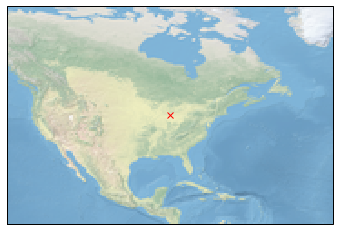

In [6]:
#Finally, we will ask the user what location they want to know the weather of

#Have the user enter a latitude and longitude
lat = input("Enter a latitude: ")
lon = input("Enter a longitude: ")

#Call the functions
get_data()
plot_map()